In [1]:
import nbsetup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from models import sparc

In [2]:
galaxies_rar = "UGC02487 UGC02885 NGC6195 UGC11455 NGC5371 NGC2955 NGC0801 ESO563-G021 UGC09133 UGC02953 NGC7331 NGC3992 NGC6674 NGC5985 NGC2841 IC4202 NGC5005 NGC5907 UGC05253 NGC5055 NGC2998 UGC11914 NGC3953 UGC12506 NGC0891 UGC06614 UGC02916 UGC03205 NGC5033 NGC4088 NGC4157 UGC03546 UGC06787 NGC4051 NGC4217 NGC3521 NGC2903 NGC2683 NGC4013 NGC7814 UGC06786 NGC3877 NGC0289 NGC1090 NGC3726 UGC09037 NGC6946 NGC4100 NGC3893 UGC06973 ESO079-G014 UGC08699 NGC4138 NGC3198 NGC3949 NGC6015".split()
galaxies_rar_dict = dict([(g,i) for i,g in enumerate(galaxies_rar)])

In [3]:
incs_rar = "31.2 ± 2.8 64.7 ± 3.4 57.0 ± 4.2 90.0 ± 0.6 52.7 ± 2.0 52.7 ± 4.3 79.9 ± 1.0 84.0 ± 2.7 45.7 ± 5.4 50.4 ± 3.5 75.3 ± 2.0 55.1 ± 1.9 50.5 ± 5.2 60.3 ± 2.0 81.9 ± 5.2 90.0 ± 0.6 67.9 ± 2.0 87.5 ± 1.8 36.8 ± 3.2 43.8 ± 0.9 57.2 ± 2.0 38.4 ± 3.1 61.9 ± 1.0 85.4 ± 3.4 90.0 ± 0.6 32.8 ± 2.6 44.5 ± 4.1 66.2 ± 3.9 65.9 ± 1.0 68.4 ± 2.0 81.7 ± 3.0 54.1 ± 4.5 68.6 ± 2.7 47.1 ± 2.8 86.1 ± 1.9 75.3 ± 4.9 67.6 ± 2.8 77.0 ± 5.2 89.0 ± 0.8 90.0 ± 0.6 67.7 ± 2.6 76.0 ± 1.0 42.9 ± 4.7 63.5 ± 3.0 52.0 ± 2.0 63.3 ± 4.1 37.7 ± 2.0 72.7 ± 2.0 49.5 ± 1.9 72.7 ± 2.8 79.4 ± 4.7 73.2 ± 7.5 53.0 ± 2.8 71.1 ± 3.1 54.8 ± 2.0 59.8 ± 2.0".split()

In [4]:
rar_dict = dict([(k, [incs_rar[galaxies_rar_dict[k]*3],incs_rar[galaxies_rar_dict[k]*3+2]]) for k in galaxies_rar])

In [2]:
from models.space import Space
from models.galaxy import Galaxy

In [11]:
profiles = sparc.generate_profiles()

/Users/timjdavey/Projects/darkness/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/timjdavey/Projects/darkness/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


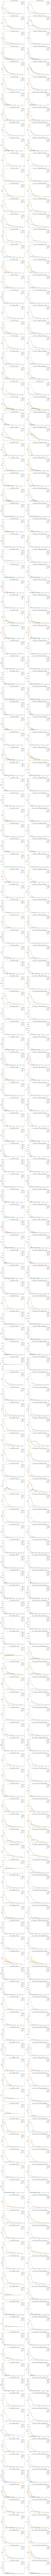

In [12]:
fig, axes = plt.subplots(len(profiles), 2, figsize=(15, 5*len(profiles)))
i = 0
for uid, prof in profiles.items():
    if uid == 'CamB':
        prof.auto_fit = False
        prof.sparc_dict['Inc'] = 65.0
        prof.plot(index=i, ax=axes[i][0])
        prof.sparc_dict['Inc'] = 26.9
        prof.plot(index=i, ax=axes[i][1])
    else:
        prof.auto_fit = False
        prof.plot(index=i, ax=axes[i][0])
        prof.auto_fit = True
        prof.plot(index=i, ax=axes[i][1])
    i += 1

In [234]:
good_examples = ['IC2574', 'NGC5985','DDO064', 'DDO161', 'F568-3']

In [235]:
points = 5000

simulations = {}
for i, uid in enumerate(good_examples):
    nbsetup.cp(i)
    prof = profiles[uid]
    
    space = Space((1,points,points), prof.max_r*4/points)
    masses, labels = prof.masses(space)
    
    sim = Galaxy(masses, space, mass_labels=labels)
    sim.profile = prof
    sim.name = uid
    sim.analyse(sim.radius_points(prof.max_r*1.5, 20))
    simulations[uid] = sim

nbsetup.cp("")

In [237]:
unity_mass_ratio = {'gas': 1, 'disk': 1, 'bul': 1}

def plot_sparc(self, ax=None):
    
    for k in ('Vobs', 'Vgas', 'Vdisk', 'Vbul'):
        if k != 'Vbul' or self.profile.is_bul:
            sns.scatterplot(x=self.profile.rotmass_df['R'], y=self.profile.rotmass_df[k], label=k, ax=ax, color=COLOR_SCHEME[k[1:]])
    
    df = self.dataframe(mass_ratios=unity_mass_ratio)
    
    for k in self.mass_labels:
        cdf = df.query("component=='%s'" % k)
        vel2 = (cdf['rd']*cdf['x_vec'])
        g = sns.lineplot(x=cdf['rd'], y=np.sign(vel2)*(np.abs(vel2)**0.5), ax=ax, label=k, color=COLOR_SCHEME[k])
        
    g.set(title=self.profile.sparc_dict['Vflat'])

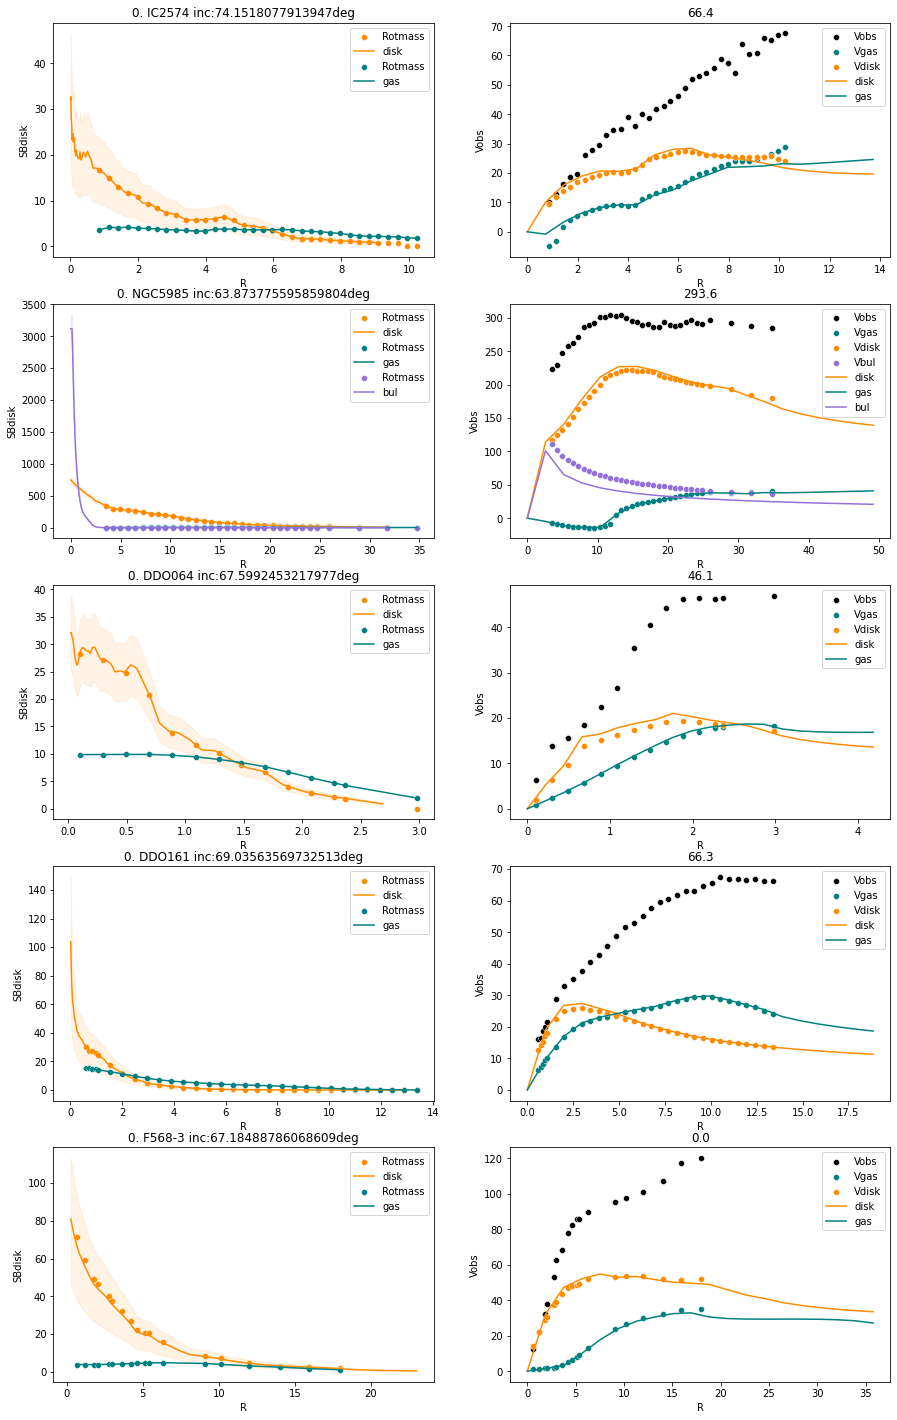

In [238]:
fig, axes = plt.subplots(len(simulations), 2, figsize=(15,5*len(simulations)))

for index, sim in enumerate(simulations.values()):
    sim.profile.plot(ax=axes[index][0])
    plot_sparc(sim, ax=axes[index][1])